In [0]:
import networkx as nx
import networkx.algorithms.isomorphism as iso
import pickle
from functools import reduce
import community as community_louvain
import matplotlib.pyplot as plt

In [60]:
pip install networkx --upgrade


Requirement already up-to-date: networkx in /usr/local/lib/python3.6/dist-packages (2.4)


Load Data

In [0]:
!wget -O ctrl.p https://www.dropbox.com/s/tizepve27132kr6/ctrl_graph.p?dl=0
!wget -O planning.p https://www.dropbox.com/s/rca7zuydbhi9ev5/planning_graph.p?dl=0
!wget -O planning.xml https://www.dropbox.com/s/31e7917jk832eu6/planning.xml?dl=0

In [0]:
ctrl = pickle.load(open('ctrl.p','rb'))
planning = pickle.load(open('planning.p','rb'))
#G=planning #digrap

G = G.to_undirected() #non digraph
G=nx.digraph.DiGraph(G)

G.to_undirected(reciprocal=True)# remove sold diriection
xmlstructure='planning.xml'


Create orginal pkg from xmi file

In [0]:
from xml.dom import minidom
xmldoc = minidom.parse(xmlstructure)
orginalPkg=[]
allclass=[]
for element in xmldoc.getElementsByTagName("UML:Package"):
  #print(" -> UML:Class ",element.getAttribute('name'))
  classesinpkg=[]
  for a in element.getElementsByTagName("UML:Class"):
    #print("   -> UML:Attr : ",a.getAttribute('name'))
    classname=a.getAttribute('name')
    v= [item for item in G.nodes if item==classname]
    
    if len(v)>0: #if node was in graph
      if len([item for item in allclass if item==classname])==0: #if class was uniq
        classesinpkg.append(classname)
        allclass.append(classname)
        
  orginalPkg.append(set(classesinpkg))
nodes=[item for item in G.nodes]
for node in nodes:
  if len([item for item in allclass if item==node])==0:
    G.remove_node(node)
    print(node)


In [65]:
print(len(G.nodes))
print(len(allclass))

219
219


Clustring Alghorithm

In [0]:
def map(l):
  results=[]
  step=0
  for cluster in l:
    for item in cluster:
      results.append(step)
    step+=1
  return results

219
0.8108164718696326
0.009216203761886808
[{'ADCCurrentInfo', 'FeatureGenerator'}, {'Spline1dSolver', 'Spline1dConstraint', 'Spline2dConstraint', 'Spline2dSolver', 'Spline2d', 'Spline2dKernel', 'ActiveSetSpline1dSolver', 'OsqpSpline1dSolver', 'Spline1d', 'AffineConstraint', 'Spline1dKernel'}, {'AutotuningBaseModel', 'AutotuningSpeedMLPModel'}, {'AutotuningSpeedFeatureBuilder', 'AutotuningFeatureBuilder'}, {'LocalView', 'QuarticPolynomialCurve1d', 'NaviTask', 'ReferenceLine', 'PathData', 'STBoundary', 'PiecewiseQuinticSpiralPath', 'SpeedOptimizer', 'BoundaryType', 'PathDecision', 'DpRoadGraphNode', 'PolynomialCurve1d', 'Obstacle', 'NaviObstacleDecider', 'ComparableCost', 'STPoint', 'PublishableTrajectory', 'PiecewiseJerkSpeedOptimizer', 'STObstaclesProcessor', 'OnLanePlanning', 'GearSwitchStates', 'ConstantDecelerationTrajectory1d', 'FrenetFramePath', 'Curve1d', 'ConstantJerkTrajectory1d', 'TrafficRule', 'NaviSpeedTsGraph', 'TrafficLight', 'OpenSpaceInfo', 'TrajectoryOptimizer', 'Coll

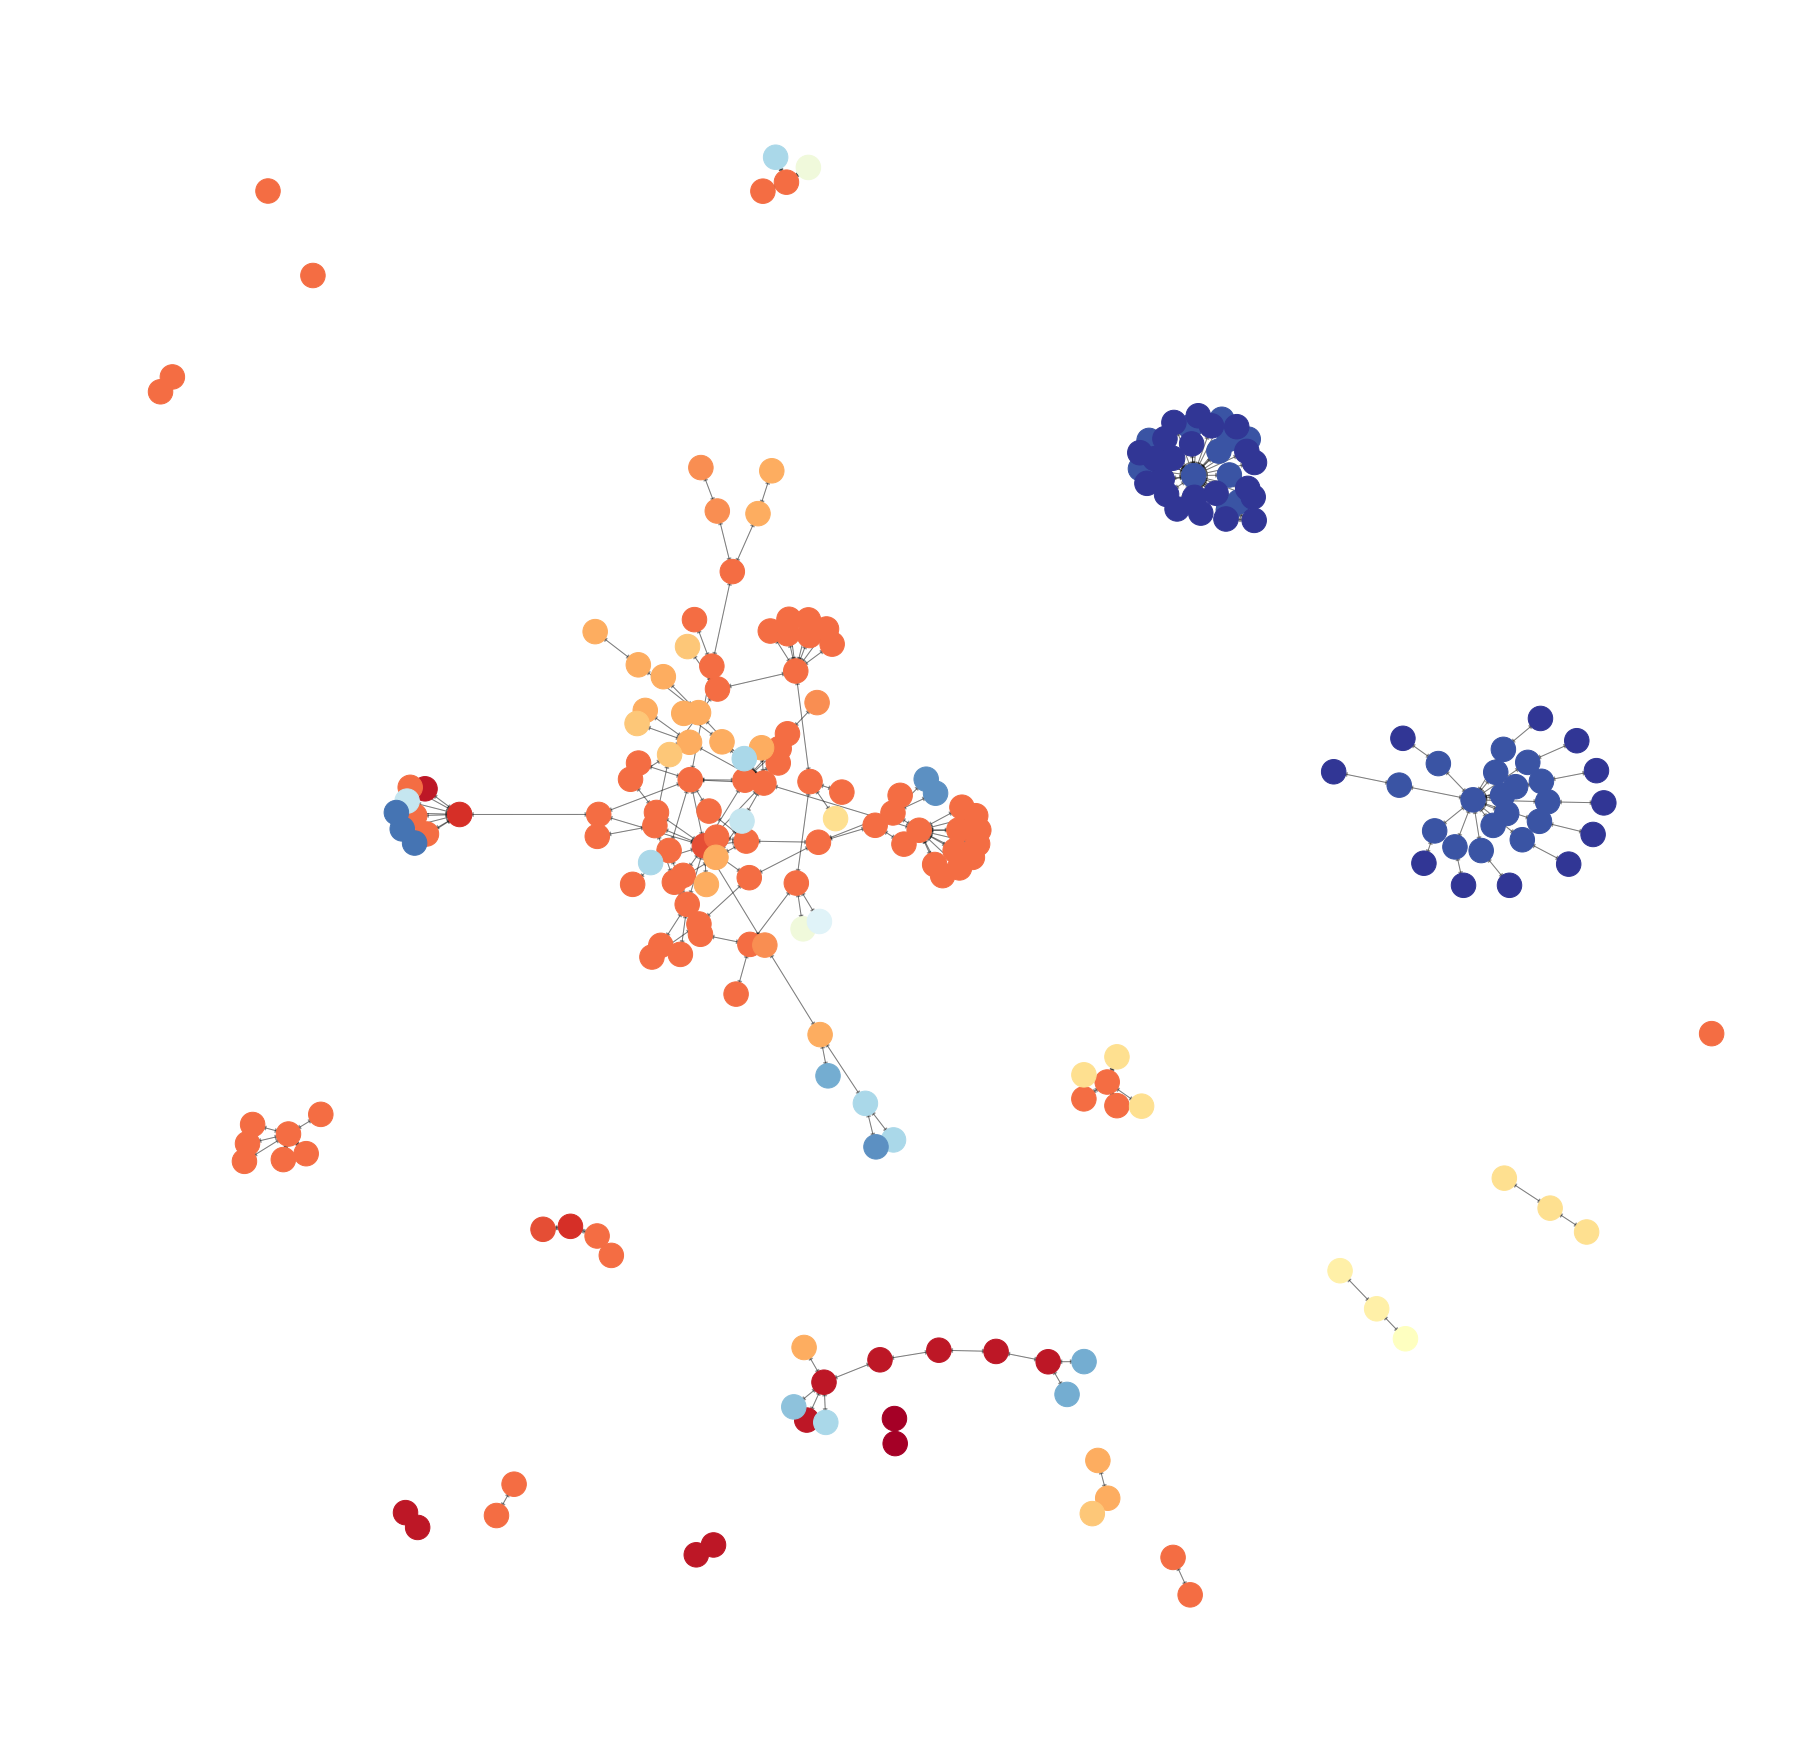

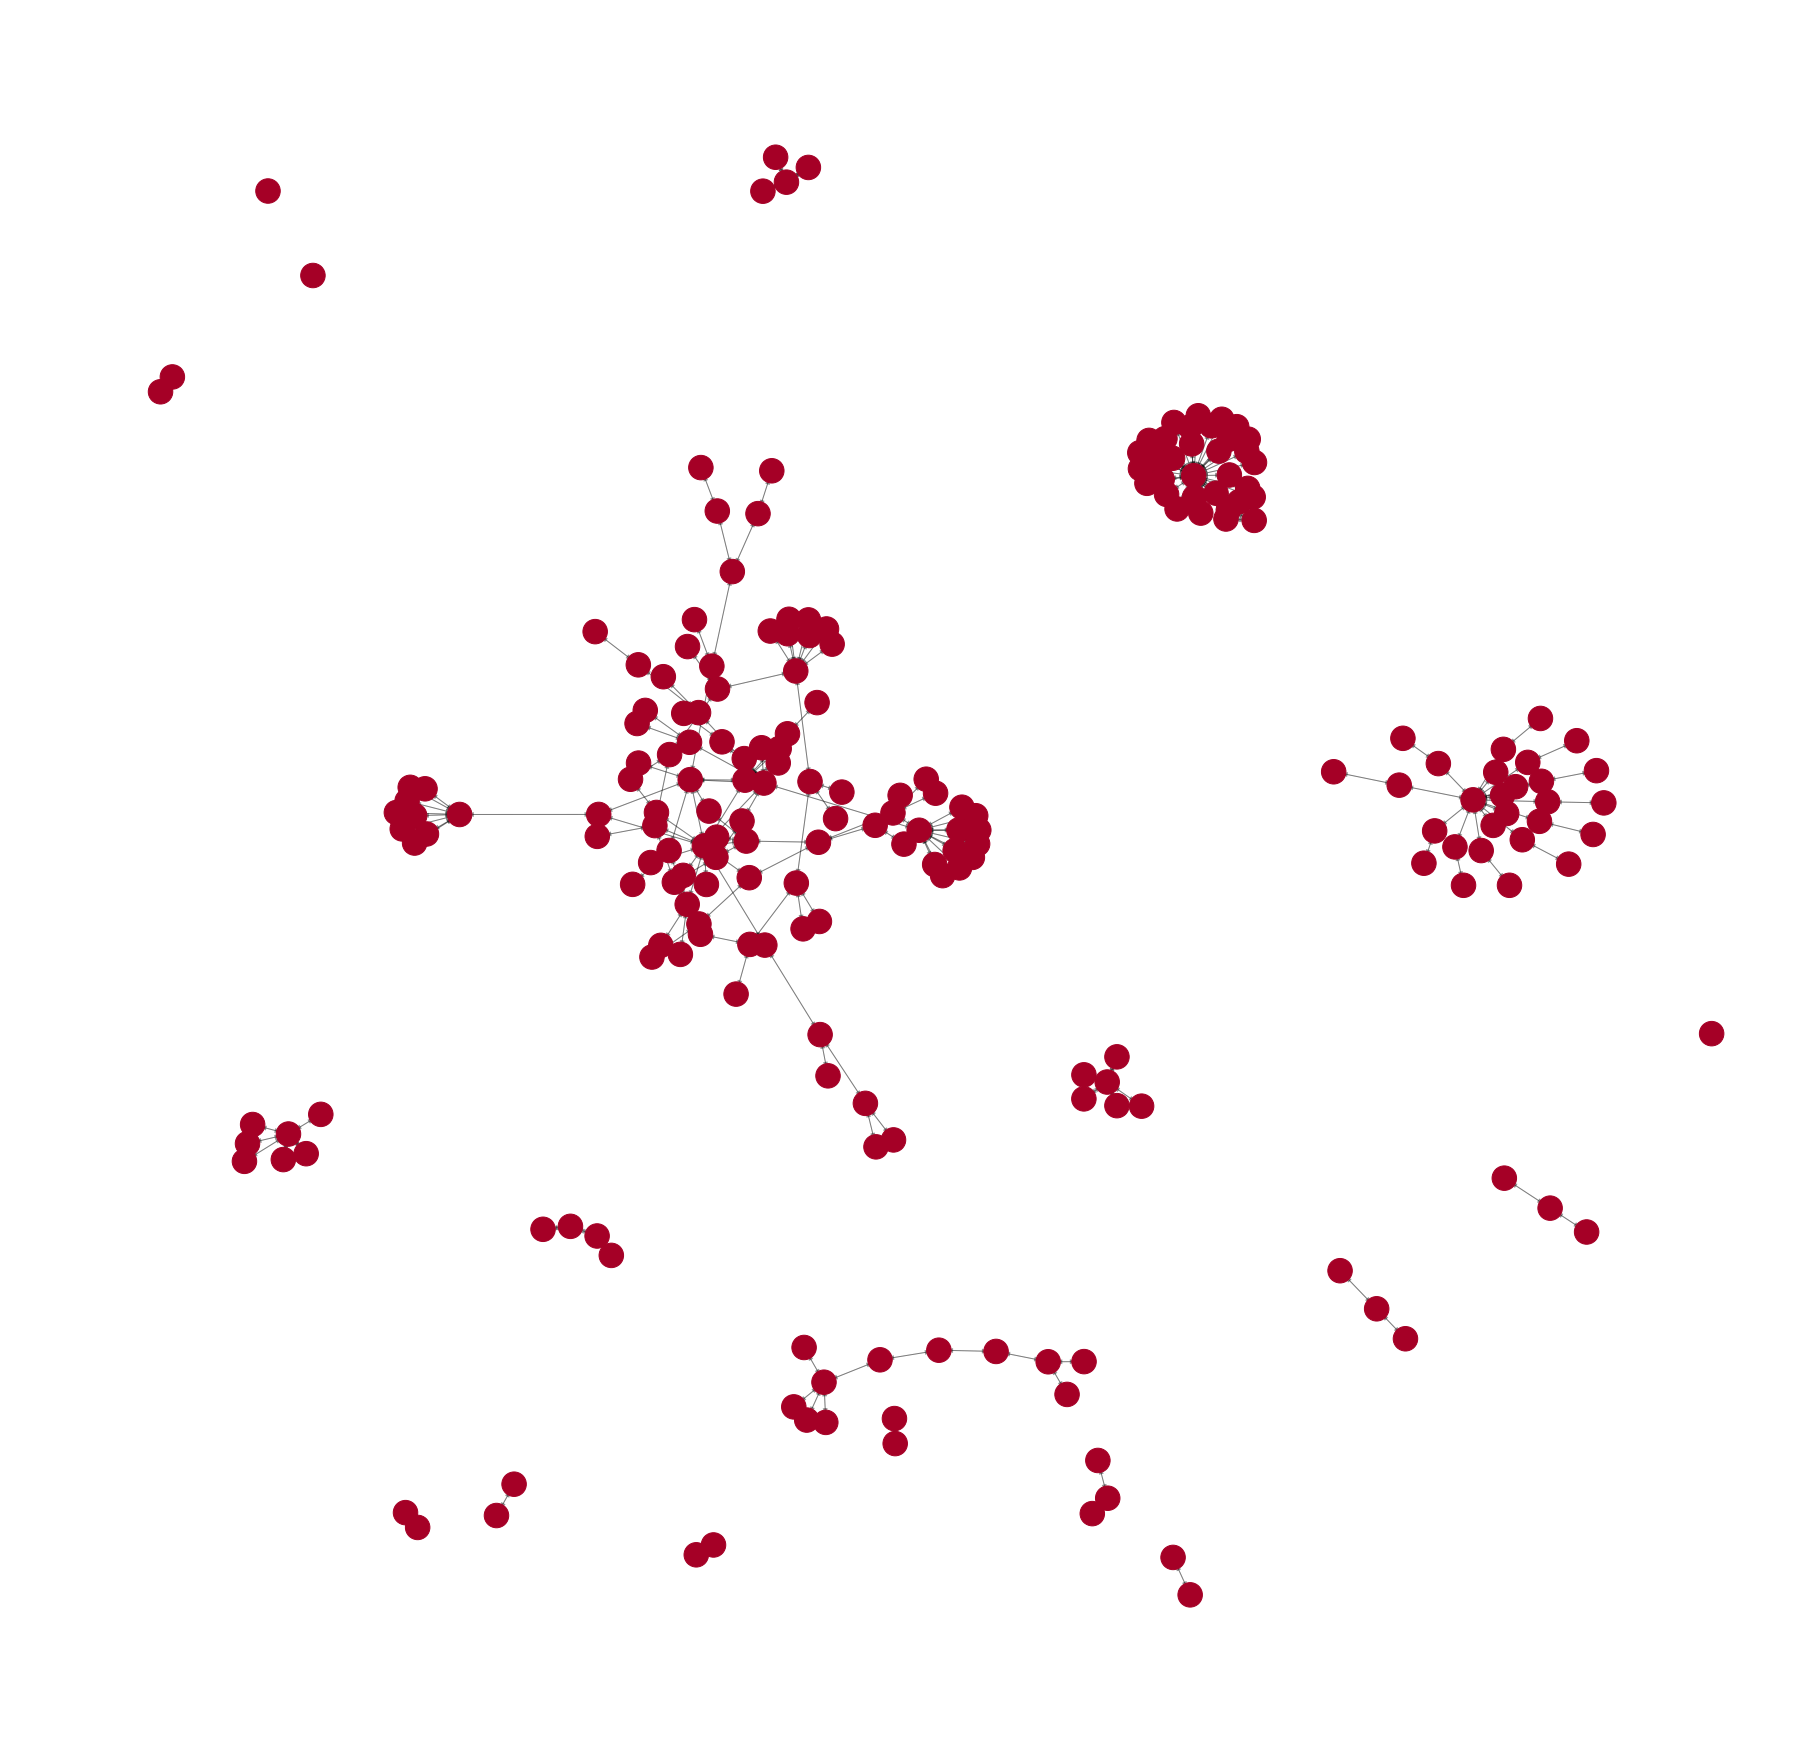

In [67]:
from networkx.algorithms import community

partition=community.girvan_newman(G)

print(len(G.nodes))

pos=nx.spring_layout(G)
plt.figure(figsize=(32, 32))
plt.axis('off')

communities=next(partition)

print(nx.community.quality.performance(G,communities))
print(nx.community.quality.performance(G,orginalPkg))

l=list(communities)
maped=map(l)
print (l)
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu,node_color=maped)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

plt.figure(figsize=(32, 32))
plt.axis('off')
maped=map(list(orginalPkg))
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu,node_color=maped)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)